In [1]:
#Auto-encoder to encode an image to lower dimentsion and re-construct it
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Import MNIST data

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('../Tensorflow Examples Models/mnist', one_hot=True)

from keras import backend as K
#Clear TF memory
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

C:\Users\StrikeWade\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting ../Tensorflow Examples Models/mnist\train-images-idx3-ubyte.gz
Extracting ../Tensorflow Examples Models/mnist\train-labels-idx1-ubyte.gz
Extracting ../Tensorflow Examples Models/mnist\t10k-images-idx3-ubyte.gz
Extracting ../Tensorflow Examples Models/mnist\t10k-labels-idx1-ubyte.gz


Using TensorFlow backend.


In [9]:
#Training Params
learning_rate = 0.01
num_steps = 30000
batch_size = 256
display_step = 200
examples_to_show = 50

#Network Params
num_hidden_1 = 256 #1st layer num features
num_hidden_2 = 128 #2nd layer num features (the latent dim)
num_input = 784 #MNIST data input (imageshape 28*28)

#TF graph input(only training images, no labels because of unsupervised)
x = tf.placeholder(dtype=tf.float32, shape=[None, num_input])

#Define weights and biases
weights = {
    'encoder_h1': tf.Variable(tf.random_normal(shape=[num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal(shape=[num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal(shape=[num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal(shape=[num_hidden_1, num_input]))
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal(shape=[num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal(shape=[num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal(shape=[num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal(shape=[num_input]))
}

In [10]:
#Building the encoder
def encoder(x):
    #Encode hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))
    
    #Encode hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']), biases['encoder_b2']))
    
    return layer_2

def decoder(x):
    #Decode hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']), biases['decoder_b1']))
    
    #Decode hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']), biases['decoder_b2']))
    
    return layer_2

In [11]:
#Construct model
encoder_op = encoder(x)
decoder_op = decoder(encoder_op)

#Prediction
y_pred = decoder_op
#Targets (labels, are the input data)
y_true = x

#Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

#Init global variables
init = tf.global_variables_initializer()

In [12]:
#Start training
#start a new TF Session
training_loss = []
sess = tf.Session()

#Run the init
sess.run(init)

#Training
for i in range(1, num_steps+1):
    #Prepare data
    #get the next batch of mnist data(only need images, not labels)
    batch_x, _ = mnist.train.next_batch(batch_size)
    
    #Run the optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={x: batch_x})
    training_loss.append(l)
    
    #Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: \n    Minibatch Loss: %.2f' % (i, l))

Step 1: 
    Minibatch Loss: 0.43
Step 200: 
    Minibatch Loss: 0.19
Step 400: 
    Minibatch Loss: 0.15
Step 600: 
    Minibatch Loss: 0.13
Step 800: 
    Minibatch Loss: 0.12
Step 1000: 
    Minibatch Loss: 0.12
Step 1200: 
    Minibatch Loss: 0.11
Step 1400: 
    Minibatch Loss: 0.11
Step 1600: 
    Minibatch Loss: 0.11
Step 1800: 
    Minibatch Loss: 0.10
Step 2000: 
    Minibatch Loss: 0.10
Step 2200: 
    Minibatch Loss: 0.10
Step 2400: 
    Minibatch Loss: 0.10
Step 2600: 
    Minibatch Loss: 0.09
Step 2800: 
    Minibatch Loss: 0.09
Step 3000: 
    Minibatch Loss: 0.09
Step 3200: 
    Minibatch Loss: 0.09
Step 3400: 
    Minibatch Loss: 0.09
Step 3600: 
    Minibatch Loss: 0.09
Step 3800: 
    Minibatch Loss: 0.09
Step 4000: 
    Minibatch Loss: 0.09
Step 4200: 
    Minibatch Loss: 0.09
Step 4400: 
    Minibatch Loss: 0.08
Step 4600: 
    Minibatch Loss: 0.08
Step 4800: 
    Minibatch Loss: 0.08
Step 5000: 
    Minibatch Loss: 0.08
Step 5200: 
    Minibatch Loss: 0.08
Step 540

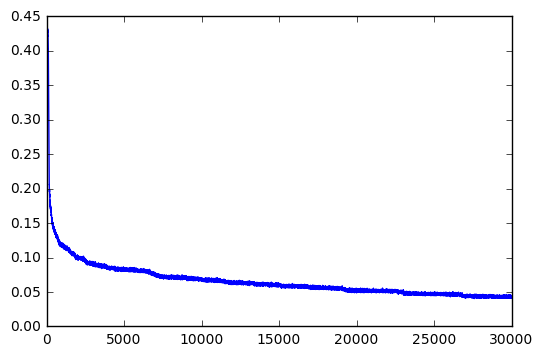

In [13]:
plt.plot(training_loss)
plt.show()

Original Images: 


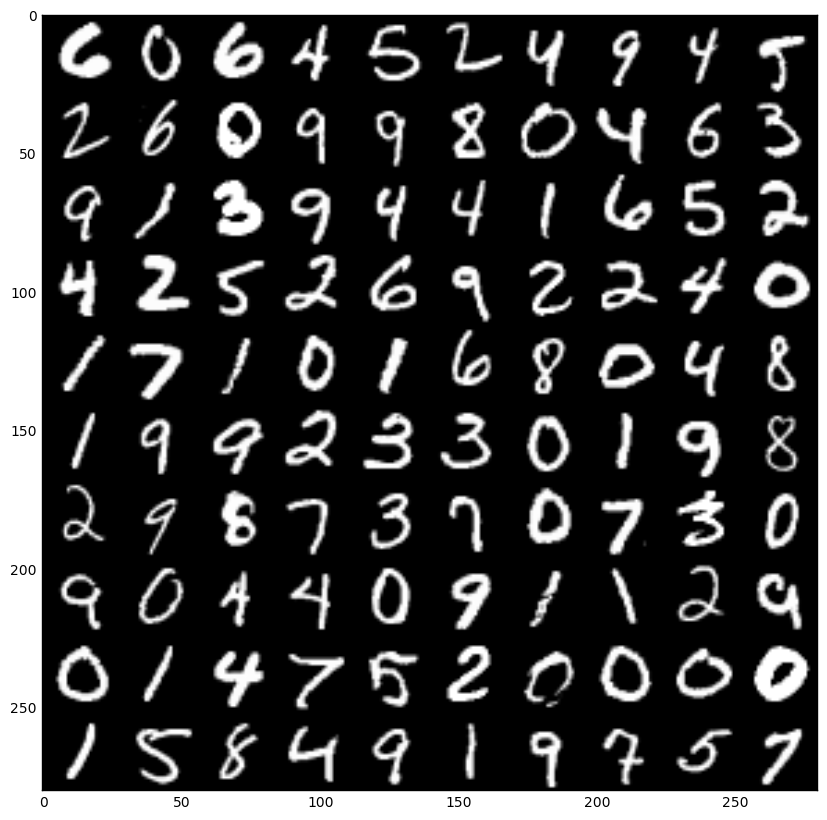

Reconstructed Images: 


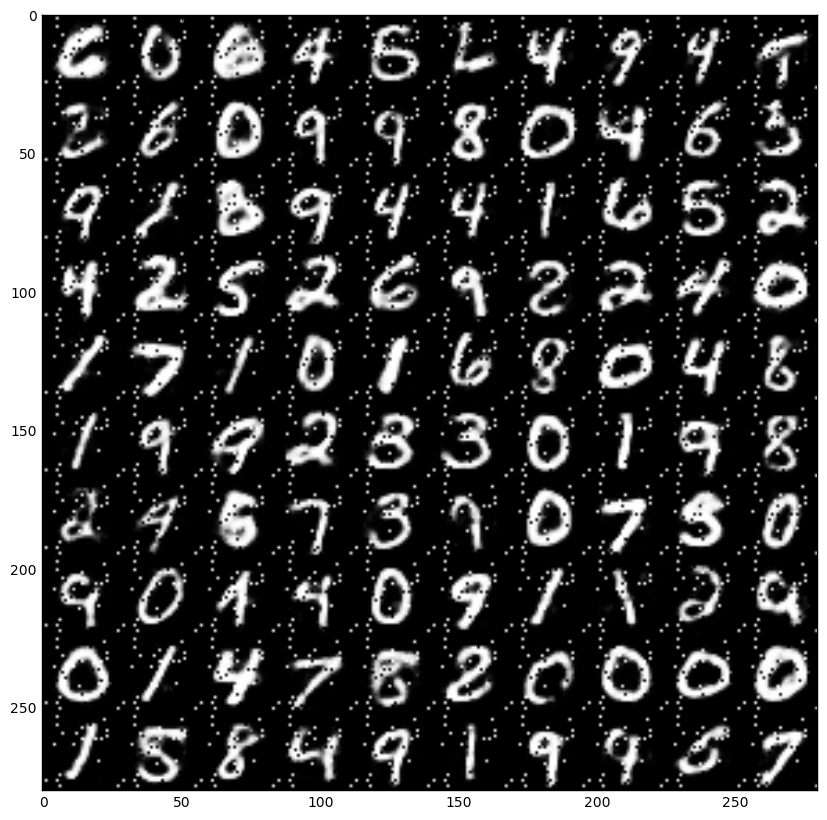

In [14]:
#Testing
#Encode and decode images from test set and visualize their reconstruction
n = 10
canvas_orig = np.empty((28*n, 28*n))
canvas_recon = np.empty((28*n, 28*n))

for i in range(n):
    #MNIST test set
    batch_x, _ = mnist.test.next_batch(n)
    
    #Encode and decode the digit image
    g = sess.run(decoder_op, feed_dict={x: batch_x})
    
    #Display the original images
    for j in range(n):
        #Draw the generated digits
        canvas_orig[i*28: (i+1)*28, j*28: (j+1)*28] = batch_x[j].reshape((28,28))
    
    #Display reconstructed images
    for j in range(n):
        canvas_recon[i*28: (i+1)*28, j*28: (j+1)*28] = g[j].reshape((28,28))
        
print('Original Images: ')
plt.figure(figsize=(n,n))
plt.imshow(canvas_orig, origin='upper', cmap='gray')
plt.show()

print('Reconstructed Images: ')
plt.figure(figsize=(n,n))
plt.imshow(canvas_recon, origin='upper', cmap='gray')
plt.show()